**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [ ]:
dataset=pd.read_csv("/content/Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**SHAPE OF THE DATASET**

In [ ]:
dataset.shape

(200, 5)

**CLEANING THE DATASET**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There are no null values in the dataset

In [ ]:
data=dataset.drop("Unnamed: 0",axis=1)

Unnamed:0 is not related to the dataset.So, the column is removed and the data as follows

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**DATA VISUALIZATION**

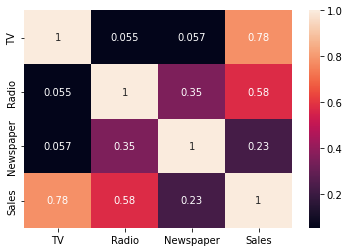

In [ ]:
sns.heatmap(data.corr(),annot=True)

Based on the heat map we can conclude that TV,Sales and Radio,Sales have high corelation.So, we perform linear regression between TV and  sales 

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


describe method gives the information about basic stastic measures like mean,standard deviation etc..

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


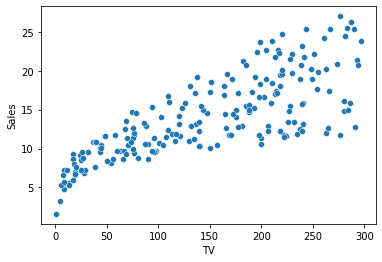

In [ ]:
sns.scatterplot(data["TV"],data["Sales"])

The above graph describes the correlation between the TV and Sales to establish a linear relationship between them.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


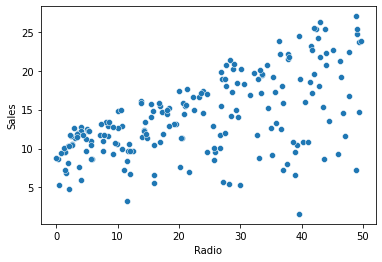

In [ ]:
sns.scatterplot(data["Radio"],data["Sales"])

The above graph describes the corelation between Radio and Sales.

**LINEAR REGRESSION**

In [ ]:
x=data[["TV"]]
y=data[["Sales"]]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
b=model.intercept_[0]

In [ ]:
M=model.coef_[0][0]

In [ ]:
print("Linear Regression parameters at:b={0},M={1}".format(b,M))

Linear Regression parameters at:b=7.032593549127695,M=0.04753664043301975


In [ ]:
model.intercept_[0]+model.coef_[0][0]*150

14.163089614080658

**PREDICTION**

In [ ]:
data_n=[150]
data_n=pd.DataFrame(data_n,columns=['TV'])
model.predict(data_n)

array([[14.16308961]])

The following represents the regression line for sales and TV 

Text(0.5, 1.0, 'Model Equation Sales=7.03+TV*0.05')

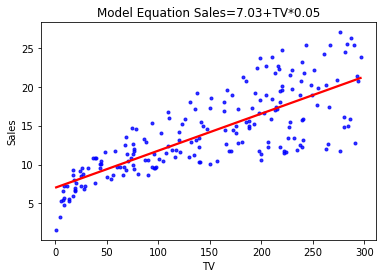

In [ ]:
graph=sns.regplot(x=x,y=y,scatter_kws={'color':'b','s':9},ci=False,color='r')
graph.set_title(f"Model Equation Sales={round(model.intercept_[0],2)}+TV*{round(model.coef_[0][0],2)}")

**REGRESSION EVALUATION METRICS**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
y_pred=model.predict(x)
mean_squared_error(y,y_pred)

10.512652915656757

In [ ]:
np.sqrt(mean_squared_error(y,y_pred))

3.2423221486546887

In [ ]:
mean_absolute_error(y,y_pred)

2.549806038927486

In [ ]:
model.score(x,y)

0.611875050850071

61% Accuracy

**MULTI LINEAR REGRESSION**

In [ ]:
X1 = data[['TV','Radio','Newspaper']]
Y1= data[["Sales"]]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [ ]:
lr=LinearRegression()
lr.fit(X1_train,Y1_train)
lr.intercept_
lr.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

**PREDICTION**

In [ ]:
data_new=[[40],[35],[56]]
data_new=pd.DataFrame(data_new).T 
data_new.columns=['TV','Radio','Newspaper']
lr.predict(data_new)

array([[11.1755496]])

In [ ]:
y_pred=lr.predict(X1_train)
np.sqrt(mean_squared_error(Y1_train,y_pred))

1.736902590147092

In [ ]:
lr.score(X1_train,Y1_train)

0.8959372632325174

got 89% Accuracy